In [17]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
dataset_ids = "IGVFFI5226LVQD IGVFFI5890AHYL urn_mavedb_00000013-a-1 urn_mavedb_00000054-a-1 urn_mavedb_00000068-b-1 urn_mavedb_00000097-0-1 urn_mavedb_00000108-a-2 urn_mavedb_00000001-c-1 urn_mavedb_00000050-a-1 urn_mavedb_00000068-a-1 urn_mavedb_00000068-c-1 urn_mavedb_00000108-a-1 Adomovich_BRCA1_CR Boettcher_TP53 Hu_BRCA2 Adomovich_BRCA1_HDR CHK2_MAVE Kozek_KCNH2 Adomovich_BRCA1_Low_Throughput".split(" ")
samples_to_plot = ['pathogenic_missense', 'benign_missense', 'synonymous', 'missense', 'gnomad']
stats = {}
for dataset_id in dataset_ids:
    observations = joblib.load(f'/mnt/d/mave_calibration/data/{dataset_id}/observations.pkl')
    stats[dataset_id] = {k : len(observations[k]) for k in samples_to_plot}

In [21]:
pd.DataFrame.from_records(stats).T

,pathogenic_missense,benign_missense,synonymous,missense,gnomad
Adomovich_BRCA1_CR,41,24,0,1352,112
Adomovich_BRCA1_HDR,37,32,0,2143,151
Adomovich_BRCA1_Low_Throughput,28,37,0,173,101
Boettcher_TP53,177,104,0,7423,96
CHK2_MAVE,5,4,473,7925,885
Hu_BRCA2,41,46,0,454,233
IGVFFI5226LVQD,32,10,451,1023,18
IGVFFI5890AHYL,0,0,0,7829,677
Kozek_KCNH2,2,0,9,200,11
urn_mavedb_00000001-c-1,44,0,296,5405,81


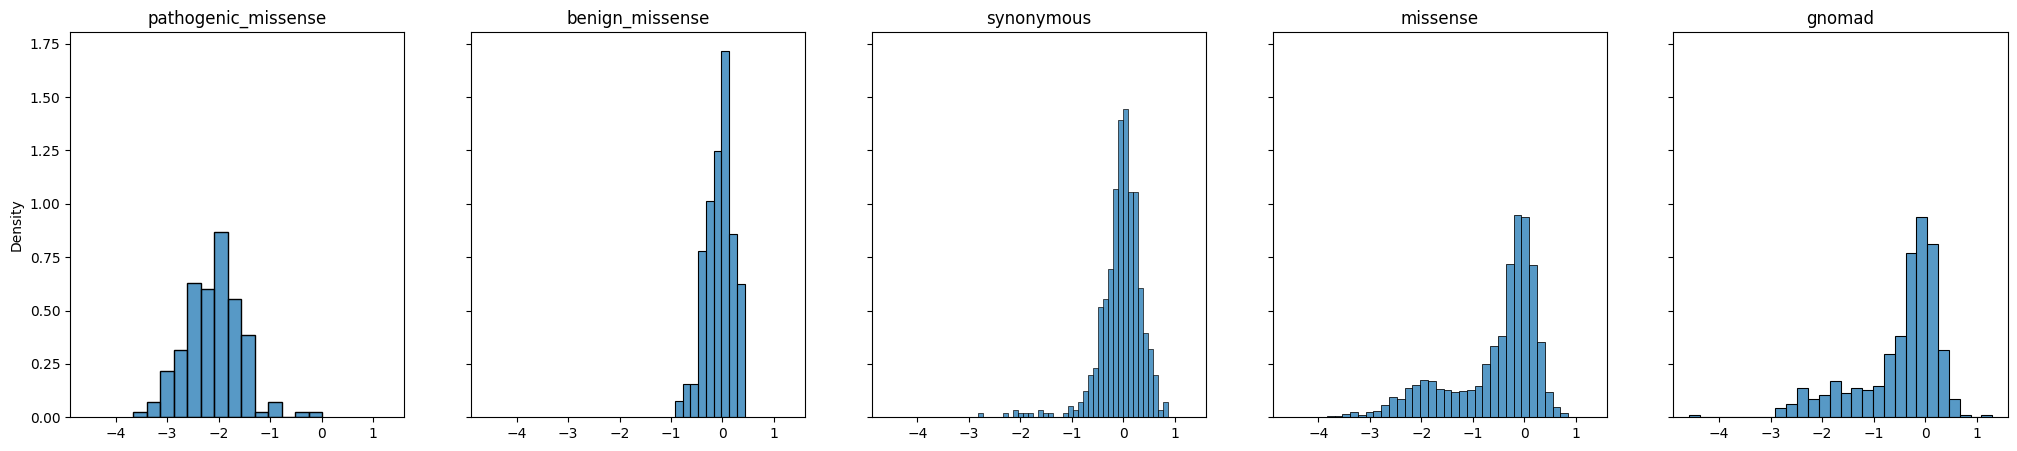

In [15]:
samples_to_plot = ['pathogenic_missense', 'benign_missense', 'synonymous', 'missense', 'gnomad']
NSamples = len(samples_to_plot)
fig,ax = plt.subplots(1,NSamples, figsize=(5 * NSamples,5),sharex=True,sharey=True)
for i, sample in enumerate(samples_to_plot):
    ax[i].set_title(sample)
    si = np.zeros(0)
    try:
        si = observations[sample]
    except KeyError:
        continue
    sns.histplot(si, ax=ax[i],stat='density')
    